# Fuel prices Prediction 30 days out Using Linear Regression

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
from datetime import datetime
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

Get the data

In [11]:
data = pd.read_csv("fuel-prices.csv")

In [12]:
data.head()

,time,price
0,960177600,1.583
1,960782400,1.607
2,961387200,1.653
3,961992000,1.664
4,962596800,1.684


In [14]:
data['time'] = data['time'].apply(lambda ts: datetime.utcfromtimestamp(ts).strftime('%d/%m/%Y'))

           time  price
0    05/06/2000  1.583
1    12/06/2000  1.607
2    19/06/2000  1.653
3    26/06/2000  1.664
4    03/07/2000  1.684
..          ...    ...
744  08/09/2014  3.634
745  15/09/2014  3.598
746  22/09/2014  3.564
747  29/09/2014  3.549
748  06/10/2014  3.494

[749 rows x 2 columns]


Plot the prices of fuel

<function matplotlib.pyplot.show(*args, **kw)>

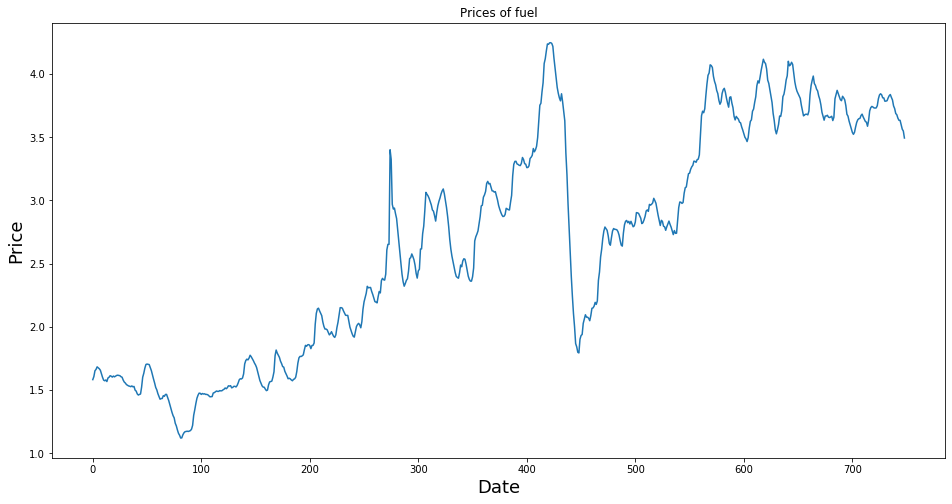

In [15]:
plt.figure(figsize=(16,8))
plt.title('Prices of fuel')
plt.plot(data['price'])
plt.xlabel('Date', fontsize=18)
#plt.set_xticklabels(data.index)
plt.ylabel('Price', fontsize=18)
plt.show

Select a subset of the Dataframe

In [16]:
dates = data[['time']]

In [17]:
data = data[['price']]

Set the column (Features) of the DataFrame and add a forecast column

In [18]:
forecastCol = 'price'## Forecast variable
data.fillna(value=-9999, inplace=True) ## Fill empty fields (NaN) with -9999
forecastOut = 30 ## days ahead
data['Label'] = data[forecastCol].shift(-forecastOut) ## Add new column and shift out negative forecast

Separate the input features and output from dataset.
Note that Adj Close is the DEPENDENT VAIRABLE ! >> X = The output variable
Hence all others are independent. >> Y = The input vairables
Using the 80/20 approach, 20% testing

FEATURES all except the Label column as an array

In [19]:
X = np.array(data.drop(['Label'],1)) 

Scaling the data into the future using X

In [21]:
X = preprocessing.scale(X)

The prediction into the future

In [22]:
XLately =X[-forecastOut:] 

In [23]:
X = X[:-forecastOut]

Drop any empty lines

In [26]:
data.dropna(inplace = True)

create the Y feature array

In [27]:
Y = np.array(data['Label'])

Split the Data

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state= 0)

Train the Linear Regression model! Regression is a form of supervised learning
Regression will output a number, therefore its useful when predicting number based problems
Like predicting stock prices !!!!
Using X_train and Y_train for training.
The X_test use to predict the output Y.

In [29]:
model = linear_model.LinearRegression()
model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Test our Model

   Actual  Predicted
0   2.789   2.927571
1   3.668   3.882085
2   3.325   2.222624
3   1.759   1.993314
4   2.802   2.867610
5   3.286   2.975377
6   3.828   3.852914
7   1.417   1.788312
8   3.287   3.070991
9   1.490   1.528211
--------------------------------------------------------------------------------


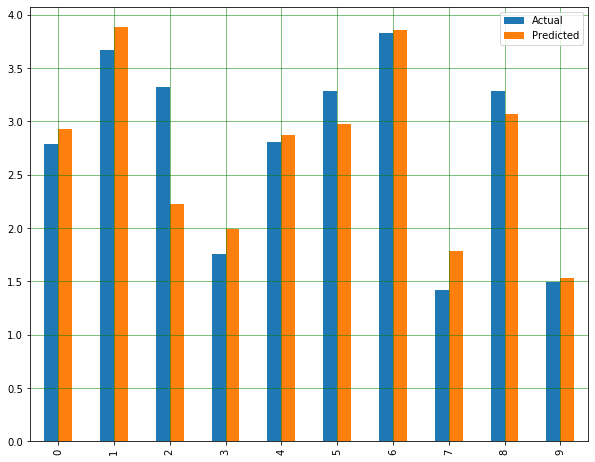

--------------------------------------------------------------------------------


In [30]:
y_pred = model.predict(X_test)
df2 = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})
print(df2.head(10)) ## Print the last 10 enteries only
print("--" * 40)
df2 = df2.head(10) ## Visualise the last 10 enteries only
df2.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()
print("--" * 40)

Prediction Forecast the next 30 days

In [31]:
forecastSet = model.predict(XLately)
print("Forecast Set", forecastSet, forecastOut)

Forecast Set [3.60901911 3.60334712 3.60253684 3.60334712 3.61793223 3.66168754
 3.68599605 3.69409889 3.68761662 3.66816981 3.66735953 3.64629215
 3.64710244 3.64953329 3.66735953 3.68194463 3.68923719 3.67060066
 3.65439499 3.61631166 3.5992957  3.56769464 3.55959181 3.53771415
 3.52393933 3.52393933 3.49476912 3.46721947 3.45506522 3.41049962] 30


add new colum to the dataframe and fill with naN (in order to create some new dates )

In [32]:
data['Forecast'] = np.nan 

In [34]:
data.tail()

,price,Label,Forecast
714,3.587,3.634,NaN
715,3.633,3.598,NaN
716,3.709,3.564,NaN
717,3.734,3.549,NaN
718,3.744,3.494,NaN


Creating the dates

In [ ]:
last_unix = last_date.timestamp()
one_day = 86400 ##the amount of seconds in a day
next_unix = last_unix + one_day

Putting the dates into the forecast Set

In [ ]:
for i in forecastSet:
    next_date = datetime.fromtimestamp(next_unix)
    next_unix += 86400
    data.loc[next_date] = [np.nan for _ in range(len(data.columns)-1)]+[i]

In [ ]:
data.head()

In [ ]:
data.tail()

Lets take a look at our data and plot it

In [ ]:
print("Dataframe Head:")
print("--" * 40)
print(data.head(10))
print("--" * 40)
 
print("Dataframe Tail:") 
print("--" * 40)
print(data.tail(10))
print("--" * 40)

plt.figure(figsize=(16,8))
plt.title('Fuel Price Linear Regression Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Price USD($)', fontsize=18)
plt.plot(data['price'])
plt.plot(data['Forecast'])
plt.legend(['price', 'Forecast'], loc = 'lower right')
plt.show()

Lets print our prediction

In [35]:
price = forecastSet[-1]
print('The predicted fuel price in 30 days is ', price)

The predicted share price on the 3rd March 2020 is 3.410499618594096


Take a look at our acuracy

In [36]:
y_pred = model.predict(X_test)

rmsd = np.sqrt(mean_squared_error(Y_test, y_pred))
r2_value = r2_score(Y_test, y_pred)
print("Intercept: ", model.intercept_)
print("Root Mean Square Error: ", rmsd)
print("R^2 Value: ", r2_value)
print("--" * 40)

Intercept:  2.749066935926269
Root Mean Square Error:  0.4462428884640266
R^2 Value:  0.7286493015526936
--------------------------------------------------------------------------------
